# <span style = color red>

# <span style = "color:red" > <center> Omar Rashad Salem - Sheet3 - Multimedia </center></span>

## Task 1:


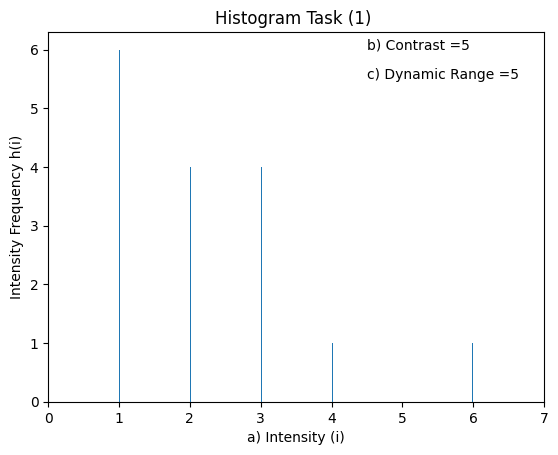

In [2]:
#task 1
#intensity ranges from 0 ~ 7 in decimal ( 000 to 111 binary)
import cv2 ; import matplotlib.pyplot as plt
import numpy as np
img = np.array([[1,3,1,2],[2,6,1,3],[1,2,3,2],[3,1,4,1]], dtype= np.uint8)
img_f = img.flatten()
b , bins , patches = plt.hist(img_f, 255 , histtype='bar') #1 - a 
plt.xlim([0,7])
plt.title("Histogram Task (1) ")
plt.xlabel("a) Intensity (i)")
plt.ylabel("Intensity Frequency h(i)")
contrast = img_f.max() - img_f.min() # 1 - b
plt.annotate(f"b) Contrast ={contrast}", [4.5,6])
dynamic_range = len(list(set(img_f))) # 1 - c
plt.annotate(f"c) Dynamic Range ={dynamic_range}", [4.5,5.5])
plt.show()
#ors


## Task 2-a  :
 it's over Exposed

## Task 2 - b :
 brightness will <span style = 'color : red '>NOT </span> affect conrtast or Dynamic range


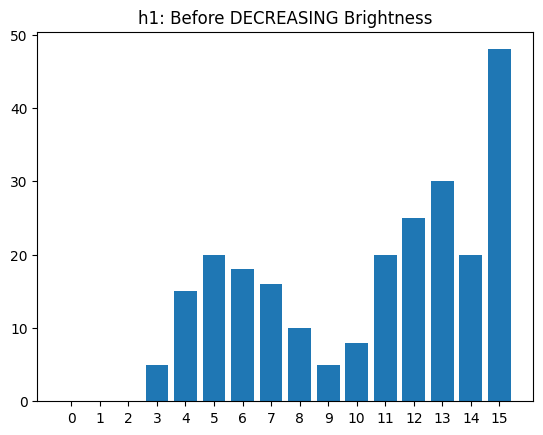

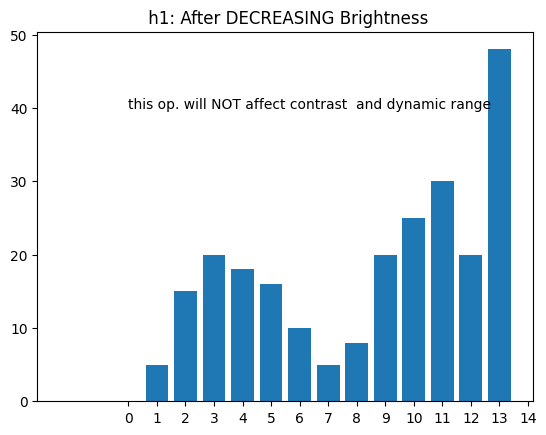

In [14]:
# Task 2

# 2 - a abs = its OVER EXPOSURED
#2 - b (point op. = reduce img. brightness by 2 units)

import cv2 
import matplotlib.pyplot as plt
import numpy as np

def bright_mod( inten_range_bins = [] , brit_value = int(0)) :
    mx = max(inten_range_bins) 
    for i in range (mx + 1) :
        inten_range_bins[i] += brit_value
    return inten_range_bins

h1_x = list(range(0,16,1))
h1_y = [0,0,0,5,15,20,18,16,10,5,8,20,25,30,20,48]

#BEFORE
bef = plt.figure()
plt.xticks(h1_x) 
plt.title("h1: Before DECREASING Brightness")
plt.bar(h1_x,h1_y)

#AFTER
aft = plt.figure()
h1_x = bright_mod ( h1_x , -2)
plt.xticks(list(range(0,16,1)))
plt.title(" h1: After DECREASING Brightness")
plt.annotate( "this op. will NOT affect contrast  and dynamic range" , [0,40])
plt.bar(h1_x,h1_y) 
plt.show()
#ors

## Task 2 - c :
multiplying all intensities with factor i.e.(changing contrast) will <span style = 'color : red '>indeed change  contrast </span>  .

and will<span style = 'color : red '> change </span>  <span style = 'color : red '> Dynamic range </span> as number of utilized intensities has changed.


<BarContainer object of 16 artists>

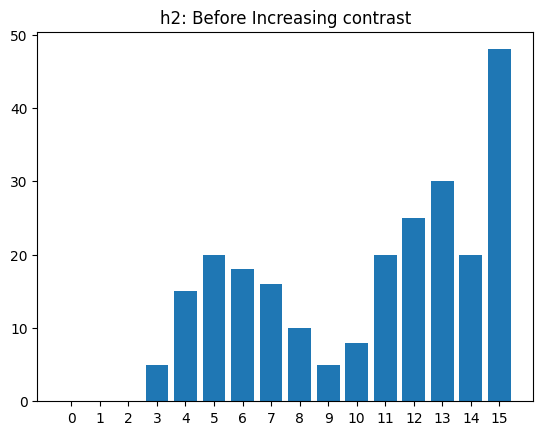

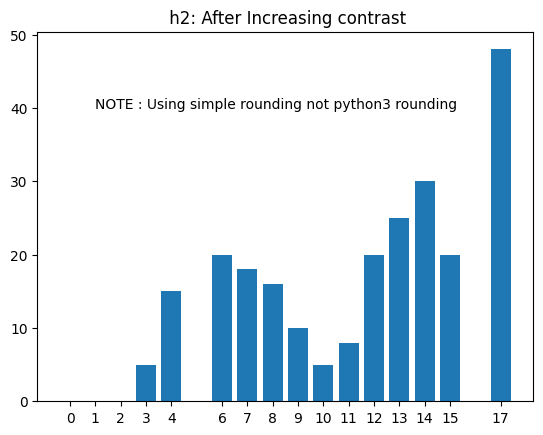

In [4]:
#task 2 - c 
import cv2 
import matplotlib.pyplot as plt
import numpy as np



def contr_mod( inten_range_bins = [] , factor_value = int(0)) :
    mx = len(inten_range_bins)

    for i in range ( mx ) : #fixed round half to even issue of round()
        tmp = inten_range_bins[i] * 1.1
        if int(tmp) % 2 == 0 :
            inten_range_bins[i] = round ( inten_range_bins[i] * 1.1 + 0.1)
        else :
            inten_range_bins[i] = round ( inten_range_bins[i] * 1.1)

    return inten_range_bins

h1_x = list(range(0,16,1))
h1_y = [0,0,0,5,15,20,18,16,10,5,8,20,25,30,20,48]

#BEFORE
bef = plt.figure()
plt.xticks(h1_x)
plt.title("h2: Before Increasing contrast")
plt.bar(h1_x,h1_y)

#AFTER
aft = plt.figure()
h1_x = contr_mod ( h1_x , 1.1)



plt.xticks(h1_x)
plt.title(" h2: After Increasing contrast")
plt.annotate("NOTE : Using simple rounding not python3 rounding", [1,40])
plt.bar(h1_x,h1_y)
plt.show()
#ors

## Task 3 :

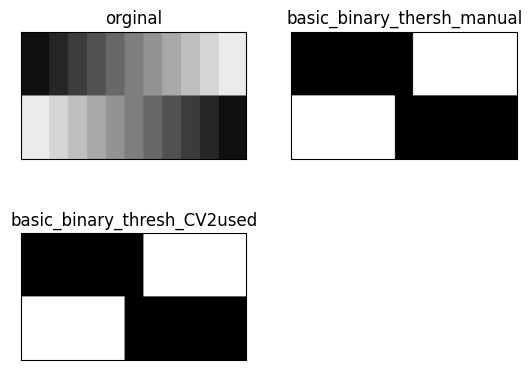

In [5]:
#task 3 
import cv2 
import matplotlib.pyplot as plt
import numpy as np

bef_img = cv2.imread("graygrid.png", cv2.IMREAD_GRAYSCALE)
binarized = np.zeros( (bef_img.shape[0] ,bef_img.shape[1]) ,dtype = np.uint8)

for i in range(binarized.shape[0]) :#rows
    for j in range(binarized.shape[1]) : #colms
        if bef_img[i,j] >= 255//2 :
            binarized[i,j] = 255
        else :
            binarized[i,j] = 0


after_img = cv2.imread("graygrid.png", cv2.IMREAD_GRAYSCALE)
thresh_type , after_img = cv2.threshold(after_img , 127 ,255,cv2.THRESH_BINARY)

# cv2.imshow("Task 3 : Before", bef_img)
# cv2.imshow("Task 3 : After -basic thresh manual", binarized)
# cv2.imshow("Task 3 : After - basic thresh (CV2 used)", after_img)#extra on task
# cv2.waitKey(0)

titles = ["orginal" , "basic_binary_thersh_manual" , "basic_binary_thresh_CV2used"]
images = [bef_img , binarized , after_img]
for i in range(3) :
    plt.subplot(2,2,i+1) # row colums index
    plt.imshow(images[i],"gray",vmin = 0, vmax = 255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()#you can use cv2.imshow() also
#ors



## Task 4 :
openCV library in python offers 3 main threshholding methods :


1)
 simple(basic) : which has 4 types we used the binary one .


2)
adaptive threshholding (has 2 types): the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions.

3)

 Otsu's Binarization : doesnt choose arbitrary threshhold value as we did in simple binary threshold but choses it depending on some calculations which is optimal for the image.

source :

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

## here is an example on 2nd method (adaptive) :

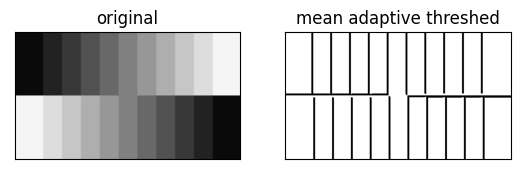

In [ ]:
#task 4  - Adaptive mean threshholding
import cv2 
import matplotlib.pyplot as plt
import numpy as np

bef_img = cv2.imread("graygrid.png", cv2.IMREAD_GRAYSCALE)
thresh_img = np.zeros( (bef_img.shape[0] ,bef_img.shape[1]) ,dtype = np.uint8)
thresh_img = cv2.adaptiveThreshold(bef_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

plt.subplot(1,2,1) , plt.imshow(bef_img,'gray') , plt.title("original")
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2) , plt.imshow(thresh_img,'gray') , plt.title("mean adaptive threshed")
plt.xticks([]),plt.yticks([])
plt.show()
#ors


## <center> END OF SHEET 3 </center>